<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/NoteBook/Machine_Learning/Tree_based/03-01-01-05-tree-based-models-decision-tree-c50-r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1bLQ3nhDbZrCCqy_WCxxckOne2lgVvn3l)

# 1.5 C5.0 Model

The **C5.0 model** is an advanced decision tree algorithm used for classification tasks in machine learning, developed by Ross Quinlan as an improvement over his earlier **C4.5 model**. It is widely used for predictive modeling, particularly in data mining and pattern recognition, due to its efficiency and ability to handle complex datasets. Below, I’ll explain what the C5.0 model is, how it works, and how it differs from the C4.5 model. Thsi also covers the implementation of the C5.0 model in R, including a simplified version of the algorithm and using the {C50} package for practical applications.


## Overview

C5.0 is a decision tree-based classifier that builds on the principles of its predecessor, C4.5, but introduces optimizations for better performance, scalability, and accuracy. It is designed to handle both categorical and continuous data, generating decision trees or rule sets to classify data into predefined categories. C5.0 is particularly popular in commercial applications due to its speed, memory efficiency, and ability to produce compact, interpretable models.


### Key Features of C5.0

- `Efficiency`: Optimized for large datasets with faster processing and lower memory usage.
- `Boosting`: Improves accuracy by combining multiple trees.
- `Rule Sets`: Offers interpretable rule-based outputs alongside decision trees.
- `Handling Imbalanced Data`: Robust to datasets with uneven class distributions.
- `Feature Importance`: Provides insights into which features are most influential in predictions.

### How Does the C5.0 Model Work?

The C5.0 algorithm constructs a decision tree or a set of rules by recursively splitting the input data based on feature values, aiming to maximize the separation of classes. Here’s a step-by-step overview of how it works:

1. Data Preparation

   - The algorithm accepts a dataset with labeled examples, where each example has features (attributes) and a target class.
   - It handles both categorical and continuous features, discretizing continuous features if needed.

2. Tree Construction

   - `Splitting Criterion`: C5.0 uses an `information gain ratio` to select the best feature to split the data at each node. This metric measures how much a feature reduces uncertainty (entropy) about the class labels, normalized to avoid bias toward features with many values.
   - `Recursive Partitioning`: The dataset is split based on the chosen feature, creating child nodes. This process repeats for each node until a stopping condition is met (e.g., all instances in a node belong to the same class, or the node is too small).
   - `Pruning`: To prevent overfitting, C5.0 applies post-pruning, removing branches that do not significantly improve classification accuracy on a validation set.

3. Rule Set Generation (Optional)

   - C5.0 can convert the decision tree into a set of if-then rules, which are often more interpretable. These rules are simplified by removing redundant conditions and grouping similar rules.

4. Boosting

   - C5.0 supports `adaptive boosting` (similar to AdaBoost), which builds multiple decision trees iteratively. Each subsequent tree focuses on correcting the errors of previous trees by assigning higher weights to misclassified instances. The final prediction is a weighted vote of all trees.

5. Prediction

   - For a new instance, the model traverses the decision tree or applies the rule set to assign a class label. In boosted models, predictions from multiple trees are combined.

6. Handling Missing Values
   - C5.0 can manage missing data by estimating probabilities for missing feature values based on the distribution of known values.

### Differences from C4.5

- `Smaller Trees`: C5.0 produces more compact models due to optimized splitting and pruning.
- `Boosting Support`: C4.5 lacks built-in boosting, while C5.0 uses it to enhance performance.
- `Rule Sets`: C5.0 can generate rule sets, not just trees, unlike C4.5.
- `Proprietary Nature`: C5.0 is commercial software, though open-source implementations exist (e.g., in R).


| Aspect                | C4.5                              | C5.0                              |
|-----------------------|-----------------------------------|-----------------------------------|
| `Output Type`       | Decision tree only               | Decision tree or rule set         |
| `Ensemble Support`  | None (single tree)               | Boosting (multiple trees)         |
| `Efficiency`        | Less efficient, larger trees     | More efficient, compact models    |
| `Feature Selection` | Basic feature selection          | Supports winnowing for irrelevant features |
| `Cost-Sensitivity`  | Not supported                    | Supported for imbalanced data     |
| `Pruning`           | Post-pruning                     | Advanced pruning techniques       |



### Key Improvements in C5.0 Over C4.5

1. `Speed and Efficiency`: C5.0 is significantly faster and uses less memory, making it suitable for large datasets. This is achieved through optimized algorithms and data structures.
2. `Boosting`: The addition of boosting allows C5.0 to achieve higher accuracy by focusing on difficult-to-classify instances.
3. `Smaller Models`: C5.0 produces more compact decision trees and rule sets, improving interpretability and reducing overfitting.
4. `Robustness`: Better handling of noisy data, missing values, and imbalanced classes.
5. `Rule Simplification`: C5.0 generates more concise and interpreable rule sets compared to C4.5’s sometimes complex outputs.

## Setup R in Python Runtype

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython

Found existing installation: rpy2 3.5.17
Uninstalling rpy2-3.5.17:
  Successfully uninstalled rpy2-3.5.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp311-cp311-linux_x86_64.whl size=314971 sha256=9085ecfd2903bc7090b98dfbebc1bf3afb2a243a35e381157def80aacee28bfe
  Stored in directory: /root/.cache/pip/wheels/e9/55/d1/47be85a5f3f1e1f4d1e91cb5e3a4dcb40dd72147f184c5a5ef
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## C5.0 Model in R from Scracth

I’ll implement a simplified version of the C5.0 algorithm in R. Implementing the full C5.0 algorithm (including gain ratio, boosting, and aggressive pruning) from scratch is highly complex and typically requires optimized libraries. Instead, I’ll:

-` Build a basic decision tree using the gain ratio as the splitting criterion, mimicking C5.0’s core splitting logic.

-  Exclude boosting and advanced pruning (as in full C5.0) due to complexity but include a simple pruning step based on error rates.

- Evaluate the model on a test set with accuracy and a confusion matrix.

Provide a textual visualization of the tree.


### Create a Dataset

In [3]:
%%R
# Create the Play Tennis dataset
data <- data.frame(
  Outlook = c("Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"),
  Temperature = c("Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"),
  Humidity = c("High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"),
  Wind = c("Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"),
  Play = c("No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No")
)

# Convert categorical variables to factors
data$Outlook <- as.factor(data$Outlook)
data$Temperature <- as.factor(data$Temperature)
data$Humidity <- as.factor(data$Humidity)
data$Wind <- as.factor(data$Wind)
data$Play <- as.factor(data$Play)

# Split data into training (80%) and testing (20%)
set.seed(123)
train_idx <- sample(1:nrow(data), 0.8 * nrow(data))
train_data <- data[train_idx, ]
test_data <- data[-train_idx, ]


###  Functions for C5.0-like Decision Tree

- **Entropy (`entropy`)**: Measures label impurity using - $\sum p_i \log_2(p_i)$, where $p_i$ is class proportion. Adds `1e-10` to avoid $\log_2(0)$. E.g., 5 Yes/5 No → entropy ~1.

- **Information Gain (`info_gain`)**: Computes gain ratio for a feature. Calculates total entropy, subtracts weighted entropy of subsets (by feature values), and divides by split info (-$\sum \frac{|D_v|}{|D|} \log_2(\frac{|D_v|}{|D|})$). Returns 0 if split info is 0. E.g., `Outlook` split reduces entropy.

- **Best Split (`best_split`)**: Picks feature with highest gain ratio. E.g., chooses `Outlook` if its gain ratio is 0.156.

- **Build Tree (`build_tree`)**: Recursively splits data on best feature. Stops if pure, max depth (3), or <2 instances. Creates leaf (majority class) or split node with child subtrees. E.g., splits on `Outlook`, then `Humidity`.


In [4]:
%%R
# Entropy calculation
entropy <- function(labels) {
  probs <- table(labels) / length(labels)
  -sum(probs * log2(probs + 1e-10)) # Add small constant to avoid log(0)
}

# Information gain calculation
info_gain <- function(data, feature, target) {
  total_entropy <- entropy(data[[target]])
  values <- unique(data[[feature]])
  weighted_entropy <- 0
  split_info <- 0
  for (val in values) {
    subset <- data[data[[feature]] == val, ]
    weight <- nrow(subset) / nrow(data)
    weighted_entropy <- weighted_entropy + weight * entropy(subset[[target]])
    split_info <- split_info - weight * log2(weight + 1e-10)
  }
  gain <- total_entropy - weighted_entropy
  if (split_info == 0) return(0) # Avoid division by zero
  gain_ratio <- gain / split_info
  return(gain_ratio)
}

# Find best feature to split
best_split <- function(data, features, target) {
  gains <- sapply(features, function(f) info_gain(data, f, target))
  best_feature <- features[which.max(gains)]
  list(feature = best_feature, gain_ratio = max(gains))
}

# Build decision tree recursively
build_tree <- function(data, features, target, max_depth = 3, depth = 0) {
  # Stopping criteria
  if (length(unique(data[[target]])) == 1 || depth >= max_depth || nrow(data) < 2) {
    return(list(
      type = "leaf",
      class = names(sort(table(data[[target]]), decreasing = TRUE))[1],
      size = nrow(data)
    ))
  }

  # Find best feature
  split <- best_split(data, features, target)
  if (split$gain_ratio == 0) {
    return(list(
      type = "leaf",
      class = names(sort(table(data[[target]]), decreasing = TRUE))[1],
      size = nrow(data)
    ))
  }

  # Split data
  node <- list(type = "split", feature = split$feature, children = list())
  values <- unique(data[[split$feature]])
  remaining_features <- setdiff(features, split$feature)

  # Create child nodes
  for (val in values) {
    subset <- data[data[[split$feature]] == val, ]
    if (nrow(subset) > 0) {
      node$children[[val]] <- build_tree(subset, remaining_features, target, max_depth, depth + 1)
    }
  }

  return(node)
}

### Predicting and Pruning the Tree

- **Predict Instance (`predict_instance`)**: Predicts class for one instance. If at a leaf, returns its class. Else, follows the tree by matching the instance’s feature value to a child node. If no matching child, defaults to majority class from training data (e.g., "Yes" for `Play`).

- **Predict Tree (`predict_tree`)**: Applies `predict_instance` to each row of a dataset, returning predictions for all instances.

- **Prune Tree (`prune_tree`)**: Simplifies tree to reduce overfitting. For a node:
  - Computes error rate of current subtree predictions.
  - Compares with error if replaced by a leaf with majority class.
  - Prunes to leaf if leaf error is lower/equal.
  - Recursively prunes child nodes if not pruned.
  - Returns updated tree.

In [5]:
%%R
# Predict for a single instance
predict_instance <- function(tree, instance) {
  if (tree$type == "leaf") {
    return(tree$class)
  }
  feature_val <- as.character(instance[[tree$feature]])
  if (feature_val %in% names(tree$children)) {
    return(predict_instance(tree$children[[feature_val]], instance))
  } else {
    return(names(sort(table(train_data$Play), decreasing = TRUE))[1]) # Default to majority class
  }
}
# Predict for a dataset
predict_tree <- function(tree, data) {
  apply(data, 1, function(row) predict_instance(tree, as.list(row)))
}

# Simple pruning based on error rate
prune_tree <- function(tree, data, target) {
  if (tree$type == "leaf") return(tree)

  # Predict with current tree
  preds <- predict_tree(tree, data)
  error <- sum(preds != data[[target]]) / nrow(data)

  # Predict with leaf (majority class)
  majority_class <- names(sort(table(data[[target]]), decreasing = TRUE))[1]
  leaf_error <- sum(data[[target]] != majority_class) / nrow(data)

  # Prune if leaf has lower or equal error
  if (leaf_error <= error) {
    return(list(type = "leaf", class = majority_class, size = nrow(data)))
  }

  # Recursively prune children
  for (val in names(tree$children)) {
    subset <- data[data[[tree$feature]] == val, ]
    if (nrow(subset) > 0) {
      tree$children[[val]] <- prune_tree(tree$children[[val]], subset, target)
    }
  }
  return(tree)
}

### Fit the Model and Evaluate

In [6]:
%%R
# Fit the model
features <- c("Outlook", "Temperature", "Humidity", "Wind")
target <- "Play"
tree <- build_tree(train_data, features, target, max_depth = 3)
pruned_tree <- prune_tree(tree, train_data, target)

# Print tree structure
print_tree <- function(tree, indent = "") {
  if (tree$type == "leaf") {
    cat(sprintf("%sClass: %s (Size: %d)\n", indent, tree$class, tree$size))
  } else {
    cat(sprintf("%sSplit on %s\n", indent, tree$feature))
    for (val in names(tree$children)) {
      cat(sprintf("%s  %s = %s:\n", indent, tree$feature, val))
      print_tree(tree$children[[val]], paste0(indent, "    "))
    }
  }
}
cat("Decision Tree:\n")
print_tree(pruned_tree)

# Evaluate on test data
predictions <- predict_tree(pruned_tree, test_data)
confusion_matrix <- table(test_data$Play, predictions)
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("\nAccuracy:", accuracy, "\n")
cat("Confusion Matrix:\n")
print(confusion_matrix)

Decision Tree:
Split on Outlook
  Outlook = Overcast:
    Class: Yes (Size: 3)
  Outlook = Rain:
    Split on Wind
      Wind = Strong:
        Class: No (Size: 2)
      Wind = Weak:
        Class: Yes (Size: 3)
  Outlook = Sunny:
    Split on Temperature
      Temperature = Hot:
        Class: No (Size: 2)
      Temperature = Mild:
        Class: Yes (Size: 1)

Accuracy: 0.3333333 
Confusion Matrix:
     predictions
      Yes
  No    1
  Yes   2


## C5.0 Model in R

To implement the C5.0 model in R, we use the {C50} package, which provides an interface to the C5.0 algorithm. Unlike RWeka (used for C4.5’s J48), C50 does not require Java, simplifying setup.  Below is a step-by-step guide to installing the package, preparing a dataset, training a C5.0 model, evaluating it, and making predictions.

### Check amd Install Other Required R Packages

Following R packages are required to run this notebook. If any of these packages are not installed, you can install them using the code below:

In [7]:
%%R
packages <- c('tidyverse',
              'plyr',
              'rpart',
              'rpart.plot',
              'partykit',
              'mlbench',
              'ggparty',
              'C50'
         )


#### Install Missing Packages

In [ ]:
%%R
# Install missing packages
new.packages <- packages[!(packages %in% installed.packages(lib='drive/My Drive/R/')[,"Package"])]
if(length(new.packages)) install.packages(new.packages, lib='drive/My Drive/R/')

#### Verify Installation

In [10]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Verify installation
cat("Installed packages:\n")
print(sapply(packages, requireNamespace, quietly = TRUE))

Installed packages:
 tidyverse       plyr      rpart rpart.plot   partykit    mlbench    ggparty 
      TRUE       TRUE       TRUE       TRUE       TRUE       TRUE       TRUE 
       C50 
      TRUE 


### Load R Packages

In [11]:
%%R
# set library path
.libPaths('drive/My Drive/R')
# Load packages with suppressed messages
invisible(lapply(packages, function(pkg) {
  suppressPackageStartupMessages(library(pkg, character.only = TRUE))
}))


#### Check Loaded Packages

In [12]:
%%R
# Check loaded packages
cat("Successfully loaded packages:\n")
print(search()[grepl("package:", search())])# Check loaded packageswer)

Successfully loaded packages:
 [1] "package:C50"        "package:ggparty"    "package:mlbench"   
 [4] "package:partykit"   "package:mvtnorm"    "package:libcoin"   
 [7] "package:grid"       "package:rpart.plot" "package:rpart"     
[10] "package:plyr"       "package:lubridate"  "package:forcats"   
[13] "package:stringr"    "package:dplyr"      "package:purrr"     
[16] "package:readr"      "package:tidyr"      "package:tibble"    
[19] "package:ggplot2"    "package:tidyverse"  "package:tools"     
[22] "package:stats"      "package:graphics"   "package:grDevices" 
[25] "package:utils"      "package:datasets"   "package:methods"   
[28] "package:base"      


### Dataset

We’ll use the "Play Tennis" dataset with four features (Outlook, Temperature, Humidity, Wind) and a binary class (Play: Yes/No).

In [14]:
%%R
# Create the Play Tennis dataset
data <- data.frame(
  Outlook = c("Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"),
  Temperature = c("Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"),
  Humidity = c("High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"),
  Wind = c("Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"),
  Play = c("No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No")
)

# Convert categorical variables to factors
data$Outlook <- as.factor(data$Outlook)
data$Temperature <- as.factor(data$Temperature)
data$Humidity <- as.factor(data$Humidity)
data$Wind <- as.factor(data$Wind)
data$Play <- as.factor(data$Play)

# View the dataset
print(data)

    Outlook Temperature Humidity   Wind Play
1     Sunny         Hot     High   Weak   No
2     Sunny         Hot     High Strong   No
3  Overcast         Hot     High   Weak  Yes
4      Rain        Mild     High   Weak  Yes
5      Rain        Cool   Normal   Weak  Yes
6      Rain        Cool   Normal Strong   No
7  Overcast        Cool   Normal Strong  Yes
8     Sunny        Mild     High   Weak   No
9     Sunny        Cool   Normal   Weak  Yes
10     Rain        Mild   Normal   Weak  Yes
11    Sunny        Mild   Normal Strong  Yes
12 Overcast        Mild     High Strong  Yes
13 Overcast         Hot   Normal   Weak  Yes
14     Rain        Mild     High Strong   No


###  Train the C5.0 Model

Use the `C5.0` function to train the model. Specify the predictors, target variable, and optional parameters.


In [15]:
%%R
# Train the C5.0 model
model <- C5.0(x = data[, c("Outlook", "Temperature", "Humidity", "Wind")],
              y = data$Play)

# Print the model summary
summary(model)


Call:
C5.0.default(x = data[, c("Outlook", "Temperature", "Humidity", "Wind")], y
 = data$Play)


C5.0 [Release 2.07 GPL Edition]  	Mon Jun 16 15:29:11 2025
-------------------------------

Class specified by attribute `outcome'

Read 14 cases (5 attributes) from undefined.data

Decision tree:

Outlook = Overcast: Yes (4)
Outlook = Rain:
:...Wind = Strong: No (2)
:   Wind = Weak: Yes (3)
Outlook = Sunny:
:...Humidity = High: No (3)
    Humidity = Normal: Yes (2)


Evaluation on training data (14 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5    0( 0.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	     5          (a): class No
	           9    (b): class Yes


	Attribute usage:

	100.00%	Outlook
	 35.71%	Humidity
	 35.71%	Wind


Time: 0.0 secs



### Prediction and Evaluation

In [16]:
%%R
# Make predictions on the training data
predictions <- predict(model, newdata = data)

# Create a confusion matrix
conf_matrix <- table(Predicted = predictions, Actual = data$Play)
print(conf_matrix)

# Calculate accuracy
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
cat("Accuracy:", accuracy, "\n")

         Actual
Predicted No Yes
      No   5   0
      Yes  0   9
Accuracy: 1 


For a more robust evaluation, use cross-validation:

In [17]:
%%R
# Perform 10-fold cross-validation
model_cv <- C5.0(x = data[, c("Outlook", "Temperature", "Humidity", "Wind")],
                 y = data$Play,
                 control = C5.0Control(CF = 0.25, minCases = 2),
                 trials = 1,  # Single tree for CV
                 cross = 10)  # 10-fold CV
summary(model_cv)


Call:
C5.0.default(x = data[, c("Outlook", "Temperature", "Humidity", "Wind")], y
 = data$Play, trials = 1, control = C5.0Control(CF = 0.25, minCases = 2),
 cross = 10)


C5.0 [Release 2.07 GPL Edition]  	Mon Jun 16 15:29:19 2025
-------------------------------

Class specified by attribute `outcome'

Read 14 cases (5 attributes) from undefined.data

Decision tree:

Outlook = Overcast: Yes (4)
Outlook = Rain:
:...Wind = Strong: No (2)
:   Wind = Weak: Yes (3)
Outlook = Sunny:
:...Humidity = High: No (3)
    Humidity = Normal: Yes (2)


Evaluation on training data (14 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5    0( 0.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	     5          (a): class No
	           9    (b): class Yes


	Attribute usage:

	100.00%	Outlook
	 35.71%	Humidity
	 35.71%	Wind


Time: 0.0 secs



### Make Predictions on New Data

Predict the class for a new instance.

In [18]:
%%R
# Create a new instance
new_instance <- data.frame(
  Outlook = "Sunny",
  Temperature = "Hot",
  Humidity = "High",
  Wind = "Weak"
)

# Ensure factors have the same levels as the training data
new_instance$Outlook <- factor(new_instance$Outlook, levels = levels(data$Outlook))
new_instance$Temperature <- factor(new_instance$Temperature, levels = levels(data$Temperature))
new_instance$Humidity <- factor(new_instance$Humidity, levels = levels(data$Humidity))
new_instance$Wind <- factor(new_instance$Wind, levels = levels(data$Wind))

# Make prediction
prediction <- predict(model, newdata = new_instance)
cat("Prediction for new instance:", as.character(prediction), "\n")

Prediction for new instance: No 


### Tune Model Parameters

C5.0 supports parameters like boosting, pruning confidence, and rule sets.

In [19]:
%%R
# Train C5.0 with boosting and rule sets
model_tuned <- C5.0(x = data[, c("Outlook", "Temperature", "Humidity", "Wind")],
                    y = data$Play,
                    trials = 10,  # 10 boosting iterations
                    rules = TRUE,  # Generate rule set instead of tree
                      control = C5.0Control(CF = 0.1, minCases = 2))
summary(model_tuned)


Call:
C5.0.default(x = data[, c("Outlook", "Temperature", "Humidity", "Wind")], y
 = data$Play, trials = 10, rules = TRUE, control = C5.0Control(CF =
 0.1, minCases = 2))


C5.0 [Release 2.07 GPL Edition]  	Mon Jun 16 15:29:27 2025
-------------------------------

Class specified by attribute `outcome'

Read 14 cases (5 attributes) from undefined.data

-----  Trial 0:  -----

Rules:

Rule 0/1: (3, lift 2.2)
	Outlook = Sunny
	Humidity = High
	->  class No  [0.800]

Rule 0/2: (2, lift 2.1)
	Outlook = Rain
	Wind = Strong
	->  class No  [0.750]

Rule 0/3: (4, lift 1.3)
	Outlook = Overcast
	->  class Yes  [0.833]

Rule 0/4: (3, lift 1.2)
	Outlook = Rain
	Wind = Weak
	->  class Yes  [0.800]

Rule 0/5: (7/1, lift 1.2)
	Humidity = Normal
	->  class Yes  [0.778]

Default class: Yes

-----  Trial 1:  -----

Rules:

Rule 1/1: (6.3/0.8, lift 1.6)
	Outlook in {Rain, Sunny}
	Wind = Strong
	->  class No  [0.787]

Rule 1/2: (3.1, lift 1.6)
	Outlook = Overcast
	->  class Yes  [0.803]

Rule 1/3: (6.2/1


This shows rules derived from the data, with confidence scores.

### Visualize the Model

Visualize the decision tree using the `plot` function from the `C50` package.

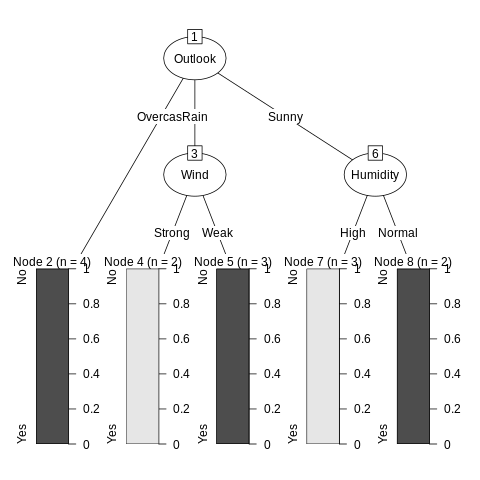

In [20]:
%%R
# Plot the decision tree
plot(model)

## Summary and Conclusion

The C5.0 model is a powerful and efficient decision tree algorithm suitable for classification tasks. It offers several advantages over its predecessor, C4.5, including improved efficiency, support for boosting, and the ability to generate rule sets. The {C50} package in R provides a user-friendly interface for implementing C5.0 models, making it accessible for data scientists and machine learning practitioners. Thsi tutorial provided a step-by-step guide to installing the necessary packages, preparing a dataset, training a C5.0 model, evaluating its performance, and making predictions. The model's flexibility in handling categorical and continuous features, along with its advanced pruning techniques, makes it a valuable tool for various classification tasks.


## References

1. Quinlan, J. R. (1993). *C4.5: Programs for Machine Learning*. Morgan Kaufmann.
   - Context for C5.0’s evolution from C4.5.
2. Kuhn, M., & Quinlan, R. (2023). *C50: C5.0 Decision Trees and Rule-Based Models*. CRAN.
   - Official `C50` package documentation: [CRAN C50](https://cran.r-project.org/web/packages/C50/C50.pdf).
3. Witten, I. H., Frank, E., & Hall, M. A. (2016). *Data Mining: Practical Machine Learning Tools and Techniques*. Morgan Kaufmann.
   - Covers decision trees and C5.0’s feature